# DRL Course 2023 Домашнее задание 4 #

Отчет по выполнению домашнего задания, Nikita Sorokin

## Используемые алгоритмы

### Cross-Entropy Method

Пусть $ \pi_0 $ начальная политика, N число итераций алгоритма, $ q \in (0, \, 1) $ - уровень квантиля. Для $ n \in \overline{0, N} $:

* (Policy evaluation)

$$
\mathbb{E}_{\pi_n} [G] \approx V_{\pi_n} := \frac{1}{K} \sum_{k = 1}{K} G(\tau_k)
$$

* (Policy improvement) Выбираем "элитные" траектории $ T_n = \{\tau_k, \, k \in \overline{1,K}: \, G(\tau_k) > \gamma_k \} $.

Обновляем политику как:

$$
\pi_{n+1} (a|s) = \frac{|(a|s) \in T_n|}{|s \in T_n|}
$$


### $\varepsilon$-Greedy Policy



Используется в последующих алгоритмах на этапе Policy Improvement

$$
\begin{array}{l}
\pi(a|s) =
\left\{
\begin{array}{ll}
1 - \varepsilon + \varepsilon / m,& \text{ если } a \in \mathrm{argmax}_{a' \in \mathcal{A}}\, Q(s,a'),\\
\varepsilon / m,& \text{ иначе }
\end{array}
\right.
\end{array}
$$



### Monte-Carlo Algorithm



Пусть $Q(s,a) = 0$, $N(s,a) = 0$ и $\varepsilon = 1$.

Для каждого эпизода $k \in \overline{1,K}$ делаем:

1. Согласно $\pi = \varepsilon\text{-greedy}(Q)$ получаем траекторию $\tau = (S_0,A_0,\ldots,S_T)$ и награды $(R_0,\ldots,R_{T-1})$. По ним определяем $(G_0,\ldots,G_{T-1}):$
$$
G_t = \sum\limits_{k=t}^{T-1} \gamma^{k-t} R_t,\quad G_{T-1} = R_{T-1},\quad G_{T-2} = R_{T-2} + \gamma R_{T-1},\quad G_i = R_i + \gamma G_{i+1},\quad G_{T} = Q(S_T,\pi_{greedy}(S_T)).
$$

2. Для каждого $t \in \overline{0,T-1}$ обновляем $Q$ и $N$:

$$
Q(S_t,A_t) \leftarrow Q(S_t,A_t) + \frac{1}{N(S_t,A_t) + 1}\big(G_t - Q(S_t,A_t)\big),
$$

$$
N(S_t,A_t) \leftarrow N(S_t,A_t) + 1
$$
Уменьшаем $\varepsilon$


### SARSA Algorithm 

Пусть $Q(s,a) = 0$ и $\varepsilon = 1$.

Для каждого эпизода $k$ делаем:

Пока эпизод не закончен делаем:

1. Находясь в состоянии $S_t$ совершаем действие $A_t \sim \pi(\cdot|S_t)$, 
где $\pi = \varepsilon\text{-greedy}(Q)$, получаем награду $R_t$, переходим в состояние $S_{t+1}$, совершаем действие $A_{t+1} \sim \pi(\cdot|S_{t+1})$

2. По $(S_t,A_t,R_t,S_{t+1},A_{t+1})$ обновляем $Q$:
$$
Q(S_t,A_t) \leftarrow Q(S_t,A_t) + \alpha(R_t + \gamma Q(S_{t+1},A_{t+1}) - Q(S_t,A_t))
$$

Уменьшаем $\varepsilon$


### Q-Learning Algorithm


Пусть $Q(s,a) = 0$ и $\varepsilon = 1$.

Для каждого эпизода $k$ делаем:

Пока эпизод не закончен делаем:

1. Находясь в состоянии $S_t$ совершаем действие $A_t \sim \pi(\cdot|S_t)$, 
где $\pi = \varepsilon\text{-greedy}(Q)$, получаем награду $R_t$  переходим в состояние $S_{t+1}$.

2. По $(S_t,A_t,R_t,S_{t+1})$ обновляем $Q$:
$$
Q(S_t,A_t) \leftarrow Q(S_t,A_t) + \alpha(R_t + \gamma \max\limits_{a'} Q(S_{t+1},a') - Q(S_t,A_t))
$$

Уменьшаем $\varepsilon$

Реализация Monte Carlo и SARSA была написана на семинарском занятие, реализация Q-learning'a:

## Задание 1 ##

Реализовать Q-Learning и сравнить его результаты с реализованными ранее алгоритмами Cross-Entropy, Monte Carlo, SARSA в задаче Taxi-v3. Для сравнения как минимум нужно использовать графики обучения.  

### Cross-Entropy

Алгоритм сходится к validation_score = 5.983 за ~40 секунд при следующих гиперпараметрах (которые были получены в домашнем задании №1):

```python

q_param = 0.6
iteration_n = 20
trajectory_n = 500

```

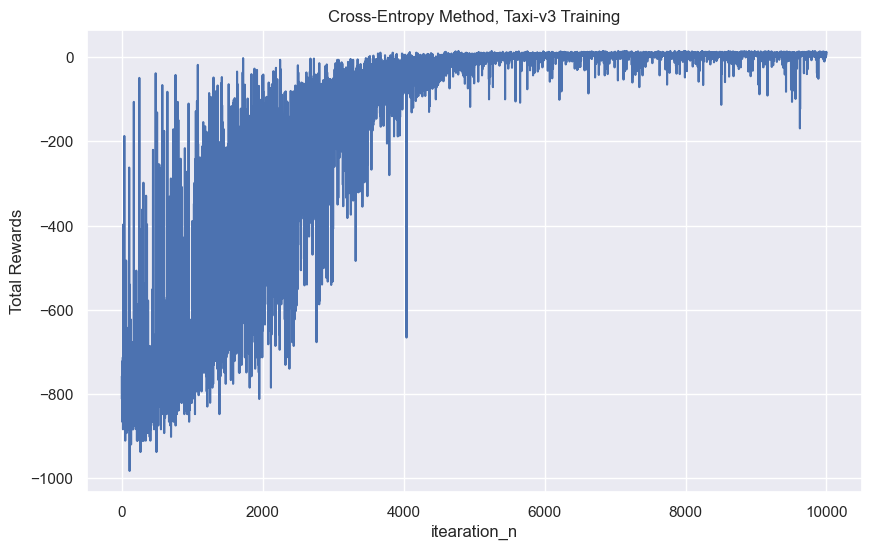

In [4]:
from IPython.display import display, Image
display(Image(filename="ce_taxi.png"))

Валидация:

```python

validation_n = 1000
validation_score = validation(env, CE_agent, validation_n=validation_n, trajectory_len=100)
print(f'Cross-Entropy method validation_score: {validation_score}')

```

Вывод:

**Cross-Entropy method validation_score: 5.983**

### Monte Carlo

Более детальное ислледование в задании №3, а пока изучим параметр $ \gamma $:

Фиксируем:
```python
episode_n = 5000
trajectory_len = 100
```

Ищем наилучший $ \gamma $ :

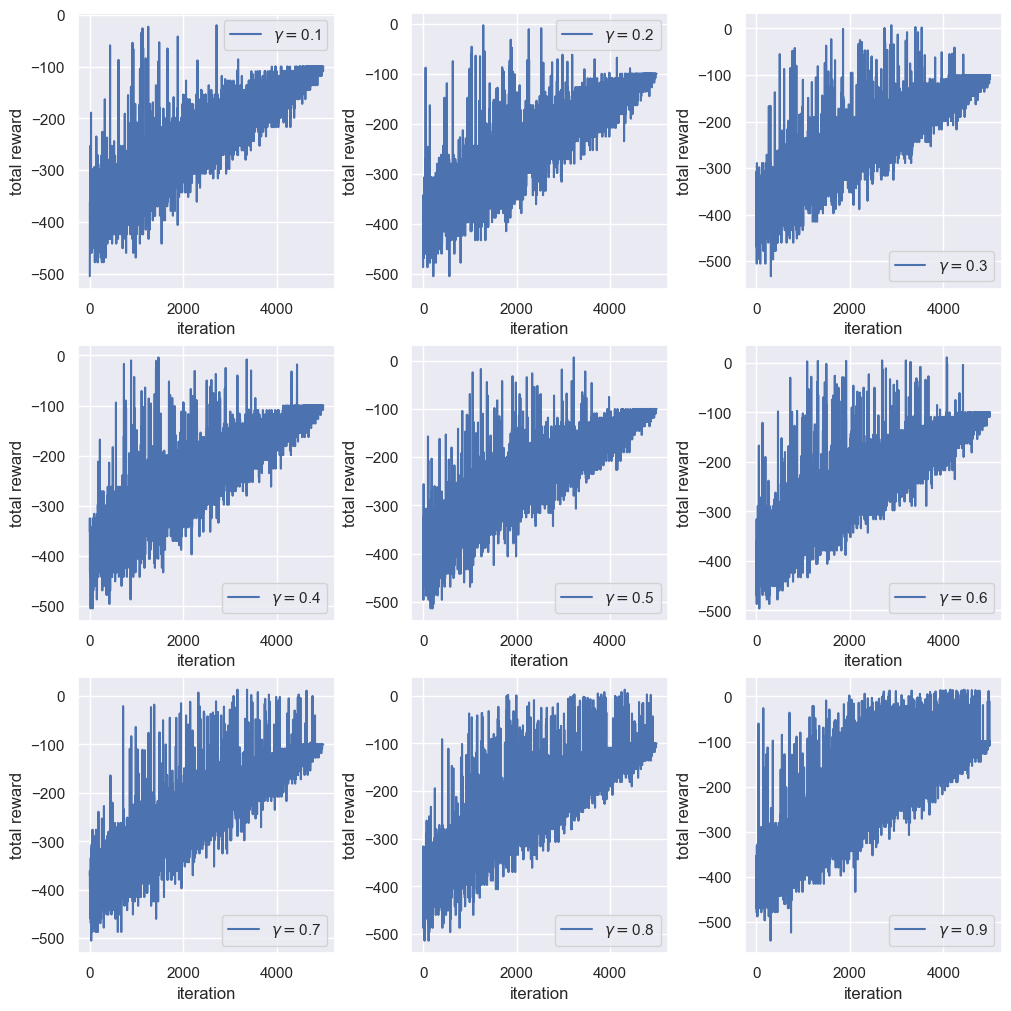

In [5]:
display(Image(filename="mc_gamma.png"))

Валидация:

*Monte Carlo algorithm validation_score, gamma = 0.1: -100.0*       
*Monte Carlo algorithm validation_score, gamma = 0.2: -100.0*    
*Monte Carlo algorithm validation_score, gamma = 0.3: -100.0*    
*Monte Carlo algorithm validation_score, gamma = 0.4: -100.0*    
*Monte Carlo algorithm validation_score, gamma = 0.5: -100.0*   
*Monte Carlo algorithm validation_score, gamma = 0.6: -100.0*    
*Monte Carlo algorithm validation_score, gamma = 0.7: -100.0*    
*Monte Carlo algorithm validation_score, gamma = 0.8: -100.0*   
**Monte Carlo algorithm validation_score, gamma = 0.9: -98.183** 


Наилучший параметр $ \gamma = 0.9 $!

Отдельный график:

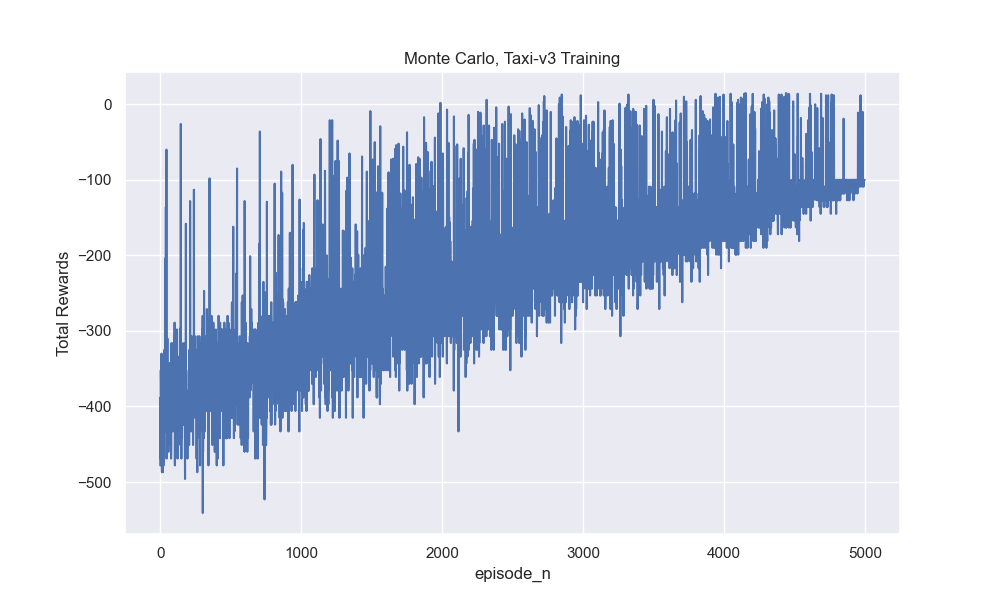

In [6]:
display(Image(filename="mc_taxi.png"))

### SARSA

Алгоритм сходится к validation_score = 8.05 за 4 секунды при следующих гиперпараметрах:

```python

episode_n = 2000
gamma = 0.9
trajectory_len = 100
alpha = 0.5

```

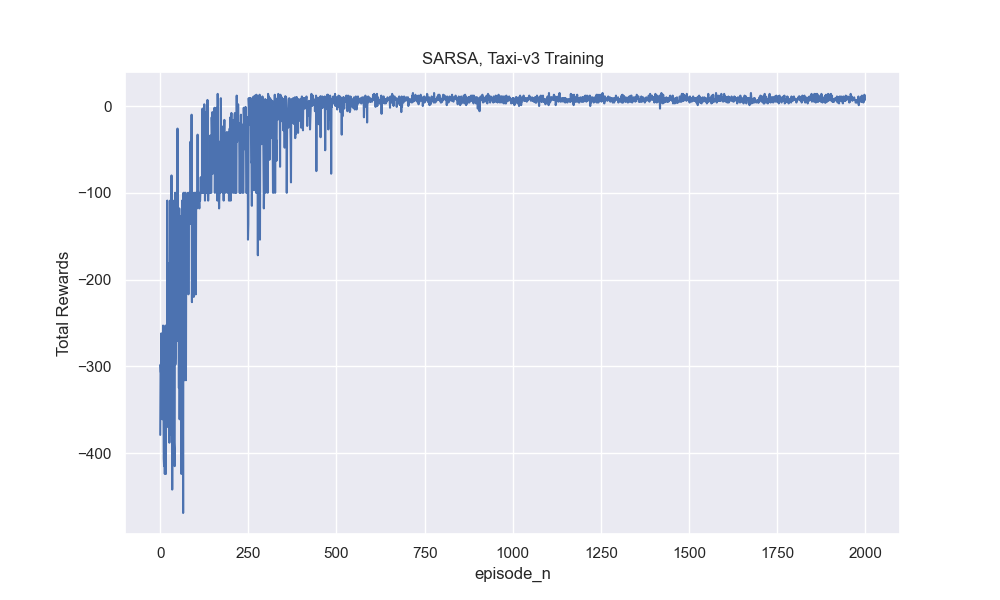

In [7]:
display(Image(filename="sarsa_taxi.png"))

Валидация:

**SARSA validation_score: 8.05**


### Q-learning

Алгоритм сходится к validation_score = 7.853 за 4 секунды при следующих гиперпараметрах:

```python

episode_n = 2000
gamma = 0.9
trajectory_len = 100
alpha = 0.5

```

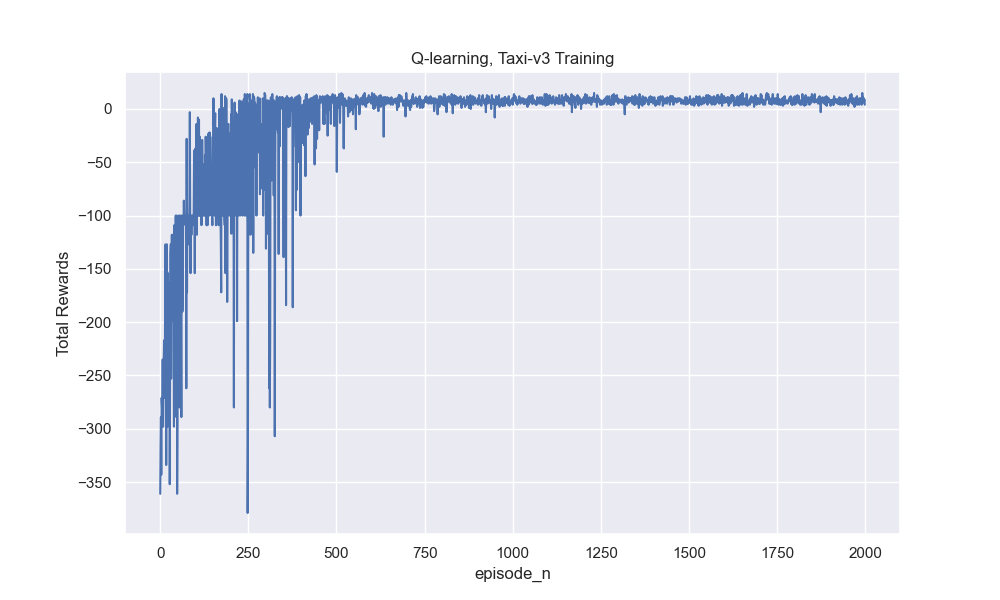

In [8]:
display(Image(filename="q_taxi.png"))

Валидация:

**Q-learning validation_score: 7.092**


Изучим гиперпараметр $ \alpha $:

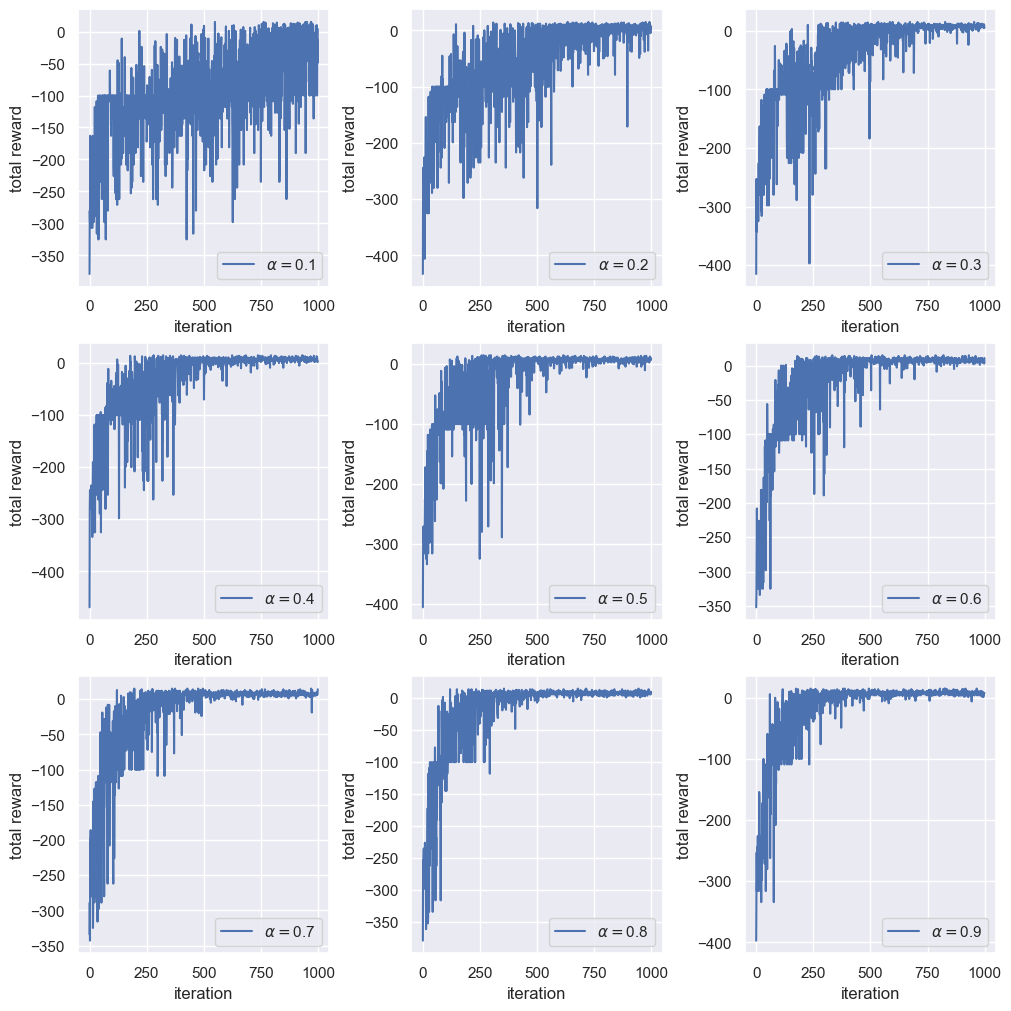

In [9]:
display(Image(filename="q_alpha.png"))

Валидация:

*Q-learning algorithm validation_score, alpha = 0.1: -126.108*   
*Q-learning algorithm validation_score, alpha = 0.2: -44.184*    
*Q-learning algorithm validation_score, alpha = 0.3: -16.632*     
*Q-learning algorithm validation_score, alpha = 0.4: 1.725*     
*Q-learning algorithm validation_score, alpha = 0.5: 1.455*     
*Q-learning algorithm validation_score, alpha = 0.6: 0.796*     
*Q-learning algorithm validation_score, alpha = 0.7: -5.562*     
**Q-learning algorithm validation_score, alpha = 0.8: 6.06**    
*Q-learning algorithm validation_score, alpha = 0.9: 3.496*     

Наилучший параметр $ \alpha = 0.8 $!

### Сравнение алгоритмов

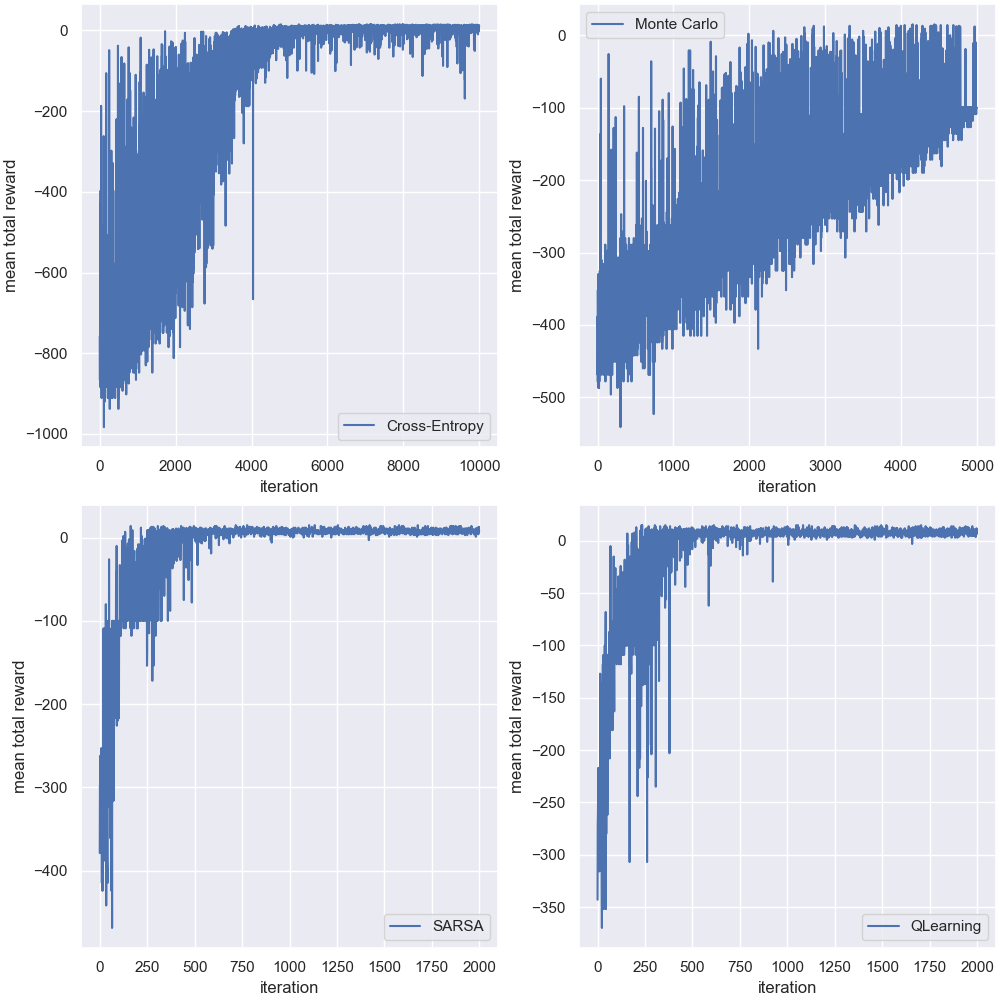

In [10]:
display(Image(filename="taxi_comparison.png"))

## Задание 2 ##

Дискретизировать (можно использовать numpy.round()) пространство состояний и обучить Агента решать CartPole-v1, Acrobot-v1, MountainCar-v0, или LunarLander-v2 (одну на выбор) методами Monte Carlo, SARSA и Q-Learning. Сравнить результаты этих алгоритмов и реализованного ранее алгоритма Deep Cross-Entropy на графиках. 

### Дискретизация пространства состояний

Основная идея состоит в следующем: непрерывное пространство состояний аппроксимируем конечной сеткой значений. Однако это не значит, что управляемый объект может двигаться только по конечному числу точек. Это лишь значит, что оказавшись в некотором состоянии агент выбирает действие не по настоящему значению состояния, а по ближайшей к нему точки на сетке.

Реализация: подается состояние объекта, функция возвращает ближайшее состояние на сетке

```python

def get_discrete_state(state, state_space, points_n, state_dim):
    state_idx = 0
    for i in range(state_dim):
        min_idx = np.abs(state_space[i] - state[i]).argmin()
        state[i] = state_space[i, min_idx]
        state_idx += min_idx * points_n**i

    return state, state_idx 

```

### MountainCar-v0

Гипотеза: обучить MountainCar-v0 будет проще и быстрее других сред, поскольку у него наименьшая размерность пространства состояний. Поскольку количество точек сетки растет экспоненциально относительно размерности дискретизируемого пространства, а размерность состояний MountainCar-v0 равна 2 (В Acrobot'e даже не хватает 8гб оперативной памяти, чтобы создать сетку с 30 точками разбиения по каждой координате: 30^6=729000000).

Так что начнем с этой среды!

```python

env = gym.make('MountainCar-v0')
state_dim = 2
action_n = 3

```

### Q-learning

Фиксируем гиперпараметры:

```python
gamma = 0.95
trajectory_len = 200
alpha = 0.2
```

Выберем оптимальный параметр дискритизации - point_n (количество точек разбиения пространства состояний).

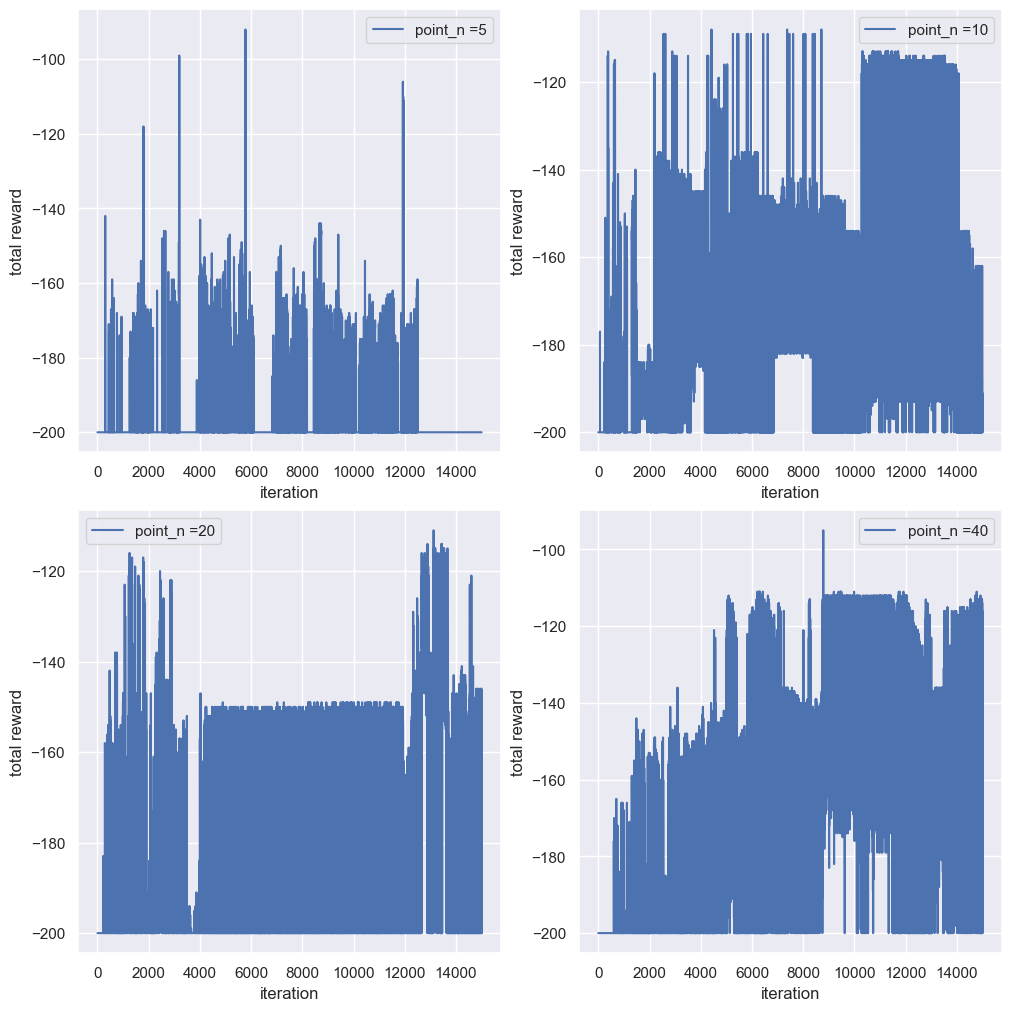

In [11]:
display(Image(filename="q_point_n.png"))

Валидация:

*Q-learning algorithm validation_score, point_n = 5: -200.0*   
*Q-learning algorithm validation_score, point_n = 10: -194.83*    
*Q-learning algorithm validation_score, point_n = 20: -175.749*    
**Q-learning algorithm validation_score, point_n = 40: -170.71**  

points_n = 40 самый удачный, доучим еще 15000 эпизодов.

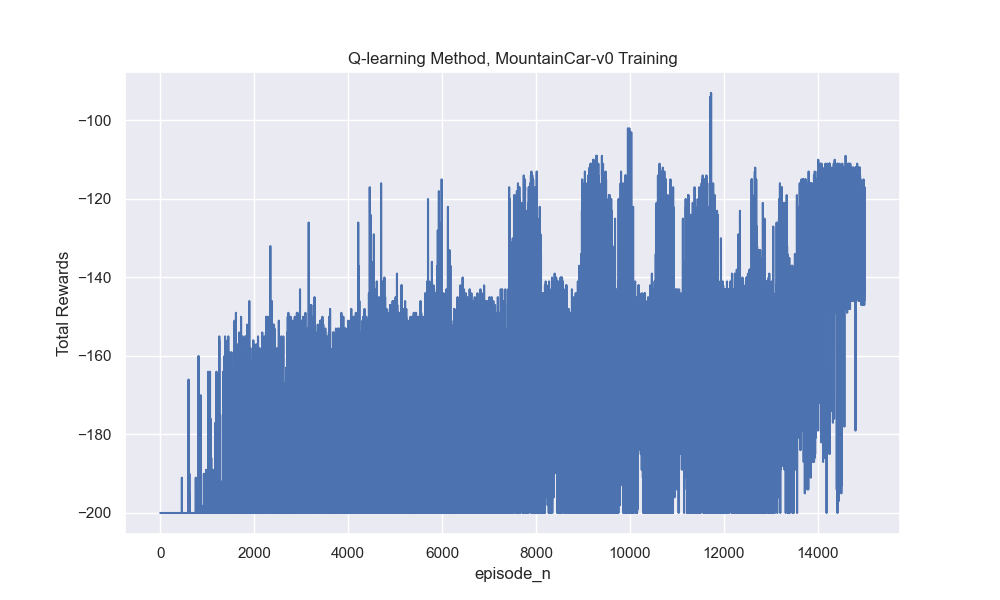

In [12]:
display(Image(filename="q_car.png"))

Валидация:

**Q-learning algorithm validation_score: -131.826**

### SARSA

Фиксируем гиперпараметры:

```python
gamma = 0.95
trajectory_len = 200
alpha = 0.2
```

Параметры полученные для Q-learning'а хорошо работают и для алгоритма SARSA. Будем учиться 30000 эпизодов.

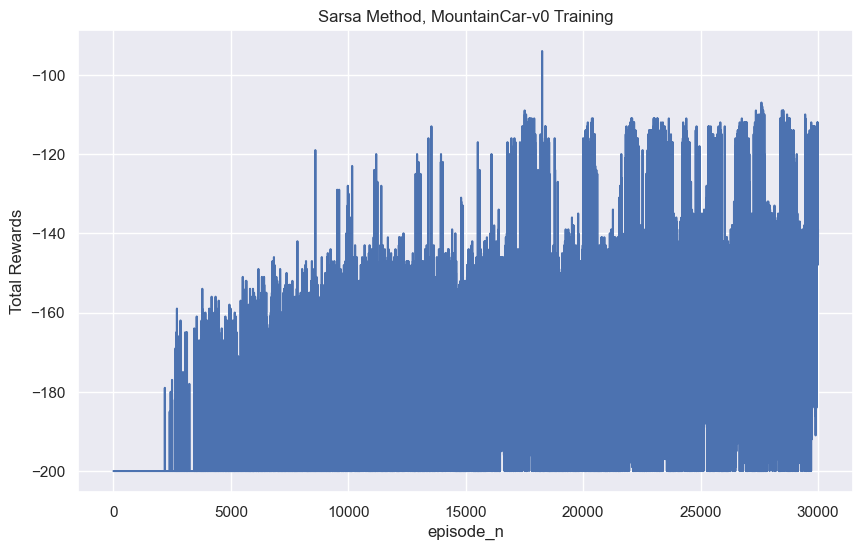

In [14]:
display(Image(filename="sarsa_car.png"))

Валидация:

**SARSA algorithm validation_score: -131.171**

### Monte Carlo

Обучиться, используя исходный алгоритм не получилось. Я добавил возможность выбора параметра $ \alpha $, аналогично тому как он используется в алгоритма SARSA и Q-learning. Кроме того понадобилось сильно больше эпизодов чем в других алгоритмах.

Фиксируем гиперпараметры:
```python
episode_n = 100000
gamma = 0.9
trajectory_len = 200
```

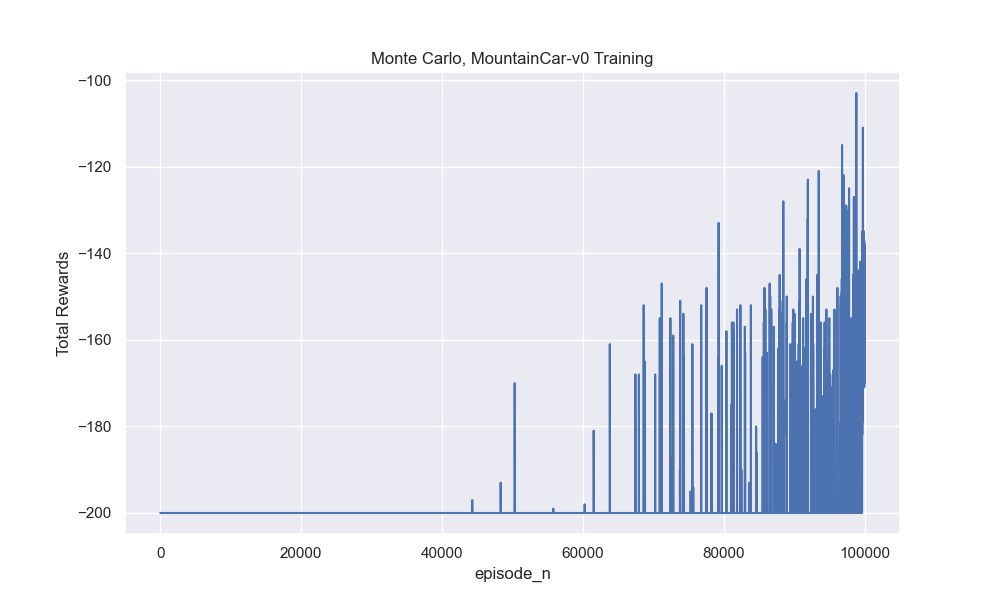

In [15]:
display(Image(filename="mc_car.png"))

Валидация:

**Monte Carlo algorithm validation_score: -151.176**

## Задание 3 ##

Придумать стратегию для выбора $ \varepsilon $ позволяющую агенту наилучшим образом решать Taxi-v3 алгоритмом Monte Carlo.

Рассмотрим несколько убывающих функций от 1 до 0 на $ x \in \mathbb{R} $:

```python
def eps1(x, n=0):
    return 1 / (x + 1)

def eps2(x, n=0):
    return 1 / np.sqrt(x + 1)

def eps3(x, n=0):
    return np.exp(-x)

def eps4(x, n=0):
    return -np.tanh(x) + 1

```

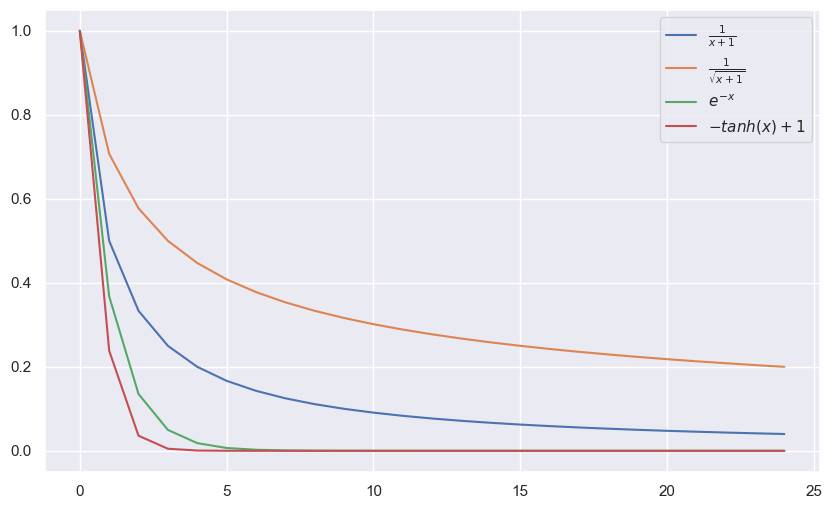

In [17]:
display(Image(filename="eps14.png"))

Фиксируем:

```python
episode_n = 10000
gamma = 0.9
trajectory_len = 100
```

Обучаемся использую эти $ \varepsilon $ в $ \varepsilon $-greedy Policy Improvement:

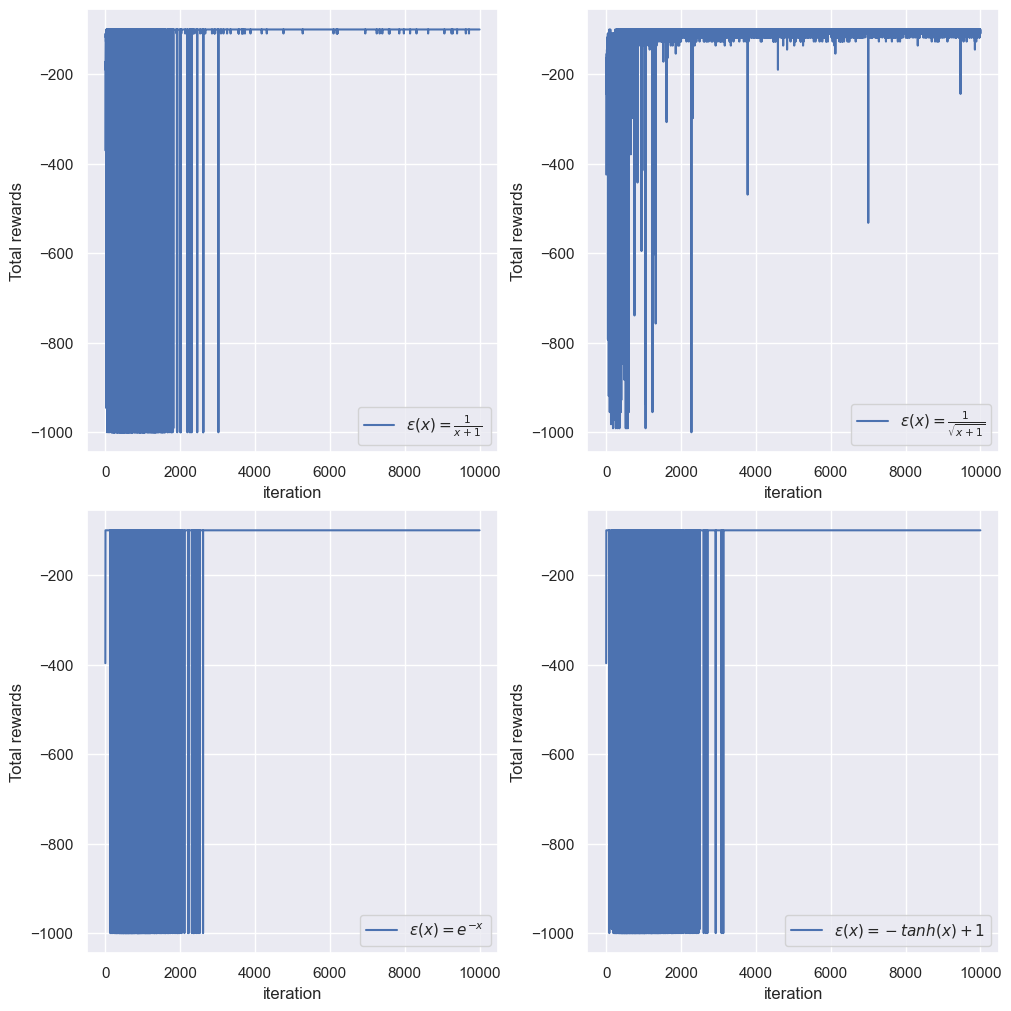

In [19]:
display(Image(filename="mc_eps14.png"))

Валидация:

Monte Carlo algorithm, eps5 validation_score: -100.0   
Monte Carlo algorithm, eps6 validation_score: -100.0   
Monte Carlo algorithm, eps7 validation_score: -100.0   
Monte Carlo algorithm, eps8 validation_score: -100.0   

C такими эпсилонами на таком количестве эпизодов получилось обучиться только тому, чтобы не пытаться подбирать пассажира вообще.

Еще стоит попробовать функции, которые интерполируют точки (1, 0) и (0, episode_n). У таких фукнций параметр $ \varepsilon $ будет равняться 1 на первой итерации алгоритма и 0 на последней итерации алгоритма.

Рассмотрим несколько убывающих функций от 1 до 0 на $ x \in [0, n] $:

```python
def eps5(x, n):
    return 1 - x / n

def eps6(x, n):
    return 1 - x**(0.5) / n**(0.5)

def eps7(x, n):
    return 1 - x**2 / n**2

def eps8(x, n):
    return 1 - x**(0.25) / n**(0.25)

```

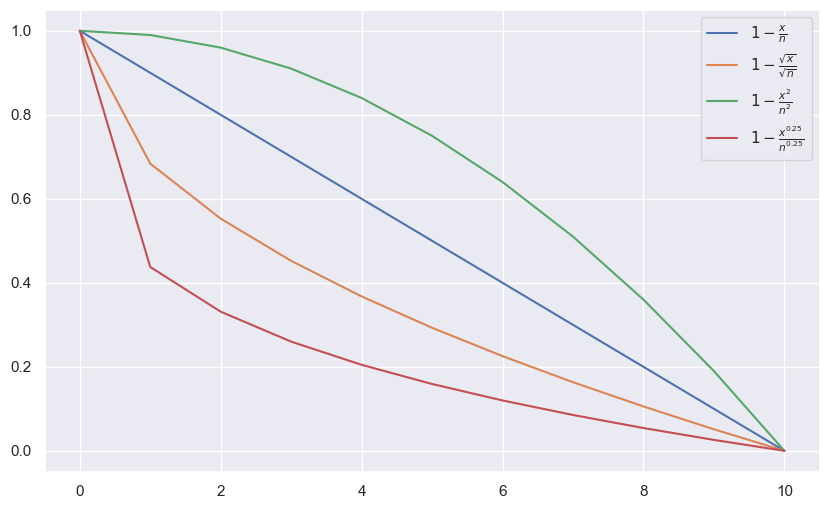

In [20]:
display(Image(filename="eps58.png"))

Те же гиперпараметры:

```python
episode_n = 10000
gamma = 0.9
trajectory_len = 100
```

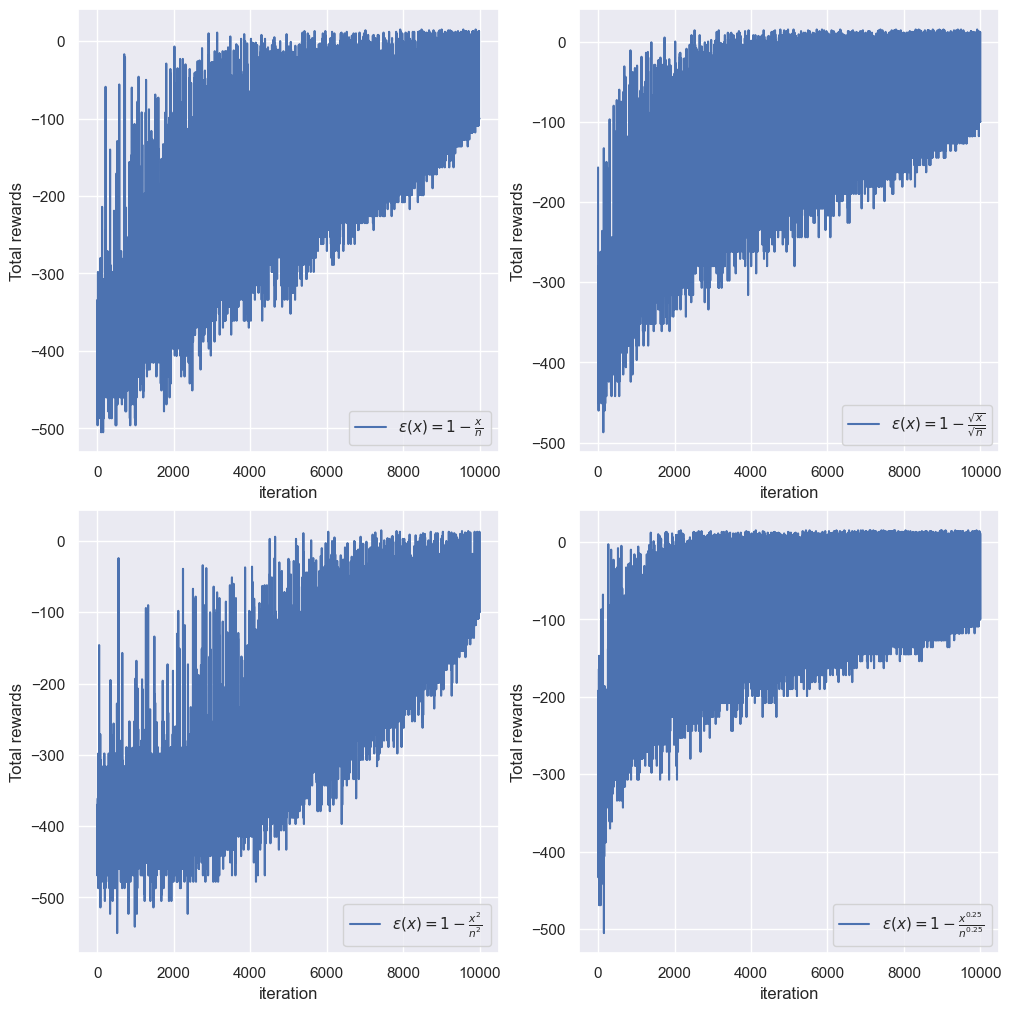

In [21]:
display(Image(filename="mc_eps58.png"))

Валидация:

*Monte Carlo algorithm, eps5 validation_score: -90.32*   
*Monte Carlo algorithm, eps6 validation_score: -79.156*   
*Monte Carlo algorithm, eps7 validation_score: -97.062*   
**Monte Carlo algorithm, eps8 validation_score: -73.993**   

Из полученного можно выдвинуть гипотезу о том, что чем меньше параметр $ \alpha $ в $ \varepsilon(x) = 1 - \frac{x^{\alpha}}{n^\alpha} $, тем лучше обучается алгоритм. Попробуем еще меньше:

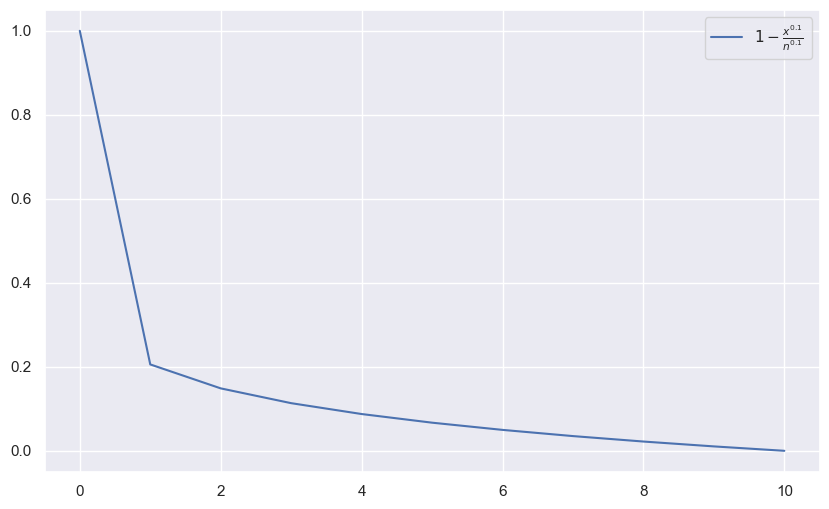

In [25]:
display(Image(filename="eps9.png"))

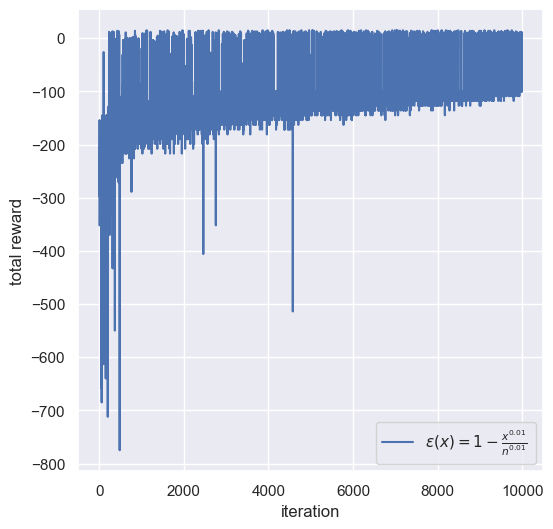

In [26]:
display(Image(filename="mc_eps9.png"))

Валидация:

*Monte Carlo algorithm, eps9 validation_score: -92.25*

Таким образом, наилучший результат был получен для следующих гиперпараметров:

```python

episode_n = 10000
gamma = 0.9
trajectory_len = 100

```

с функцией для $ \varepsilon(x) $:

$$
\varepsilon(x) = 1 - \frac{x^{0.25}}{n^{0.25}} \,\, ,
$$
где $ n $ - количество эпизодов алгоритма 


Для увеличения точности следует увеличивать количество эпизодов.

Замечание про решение задачи Taxi-v3 методом Монте Карло из чата ODS - Deep Reinfocment Learning:

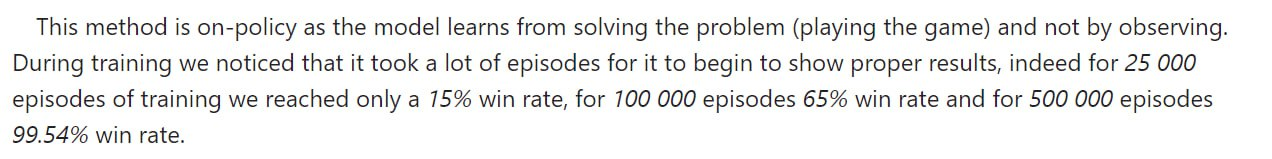

In [27]:
display(Image(filename="1.jpeg"))